In [3]:
import numpy as np 
import pandas as pd 

df = pd.read_csv(r'C:\Users\Arun JH\Desktop\vaibhavi-proj\spam.csv', sep =',', encoding = 'latin1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


DATA CLEANING

In [5]:
#Dropping the cols 
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace =True)

In [6]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
3857,ham,R u still working now?
851,ham,"I am real, baby! I want to bring out your inne..."
5067,ham,Talk to g and x about that
28,ham,"I'm back &amp; we're packing the car now, I'll..."
5045,ham,Desires- u going to doctor 4 liver. And get a ...


In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
print(df.isnull().sum())     #to find missing values 
print(df.duplicated().sum()) # to find duplicates 

target    0
text      0
dtype: int64
403


In [9]:
#to remove duplicates 
df= df.drop_duplicates(keep = 'first')
print(df.duplicated().sum())
print(df.shape)

0
(5169, 2)


EDA

In [10]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

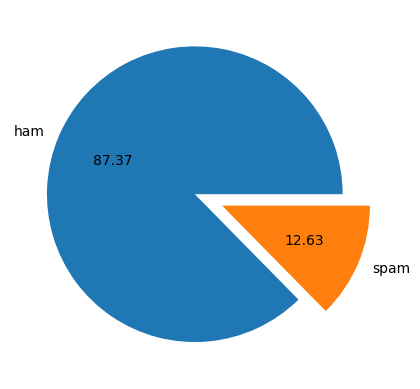

In [11]:
import matplotlib.pyplot as plt 

plt.pie(df['target'].value_counts(), labels = ['ham','spam'],explode =[0 , 0.2],autopct ="%0.2f")
plt.show()


In [12]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Arun
[nltk_data]     JH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df['num_char'] = df['text'].apply(len)
df.head()


,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
# to fetch the number of words
import re

df['num_words'] = df['text'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14


In [15]:
df['num_senten'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)))
df.head()

,target,text,num_char,num_words,num_senten
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,0


<Axes: xlabel='num_char', ylabel='Count'>

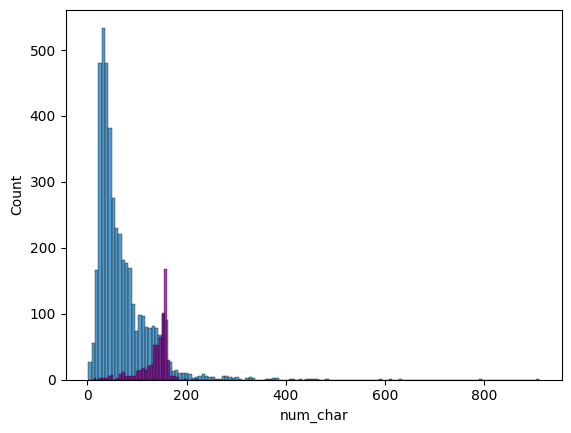

In [16]:
#spotting the difference between the ham and spam messages 
import seaborn as sns 

sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'], color= 'purple')


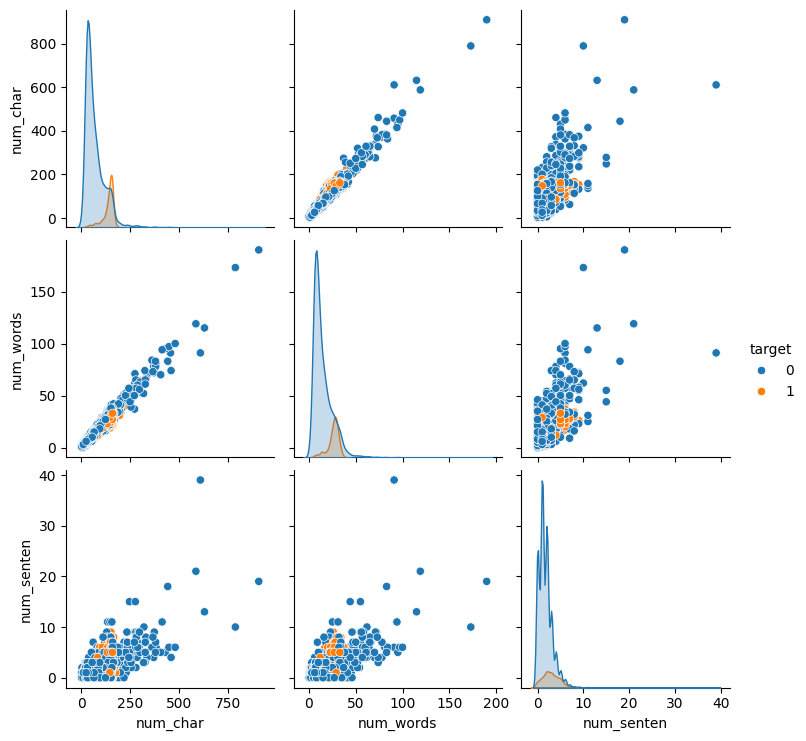

In [17]:
# to find the relationship 
sns.pairplot(df, hue ='target')

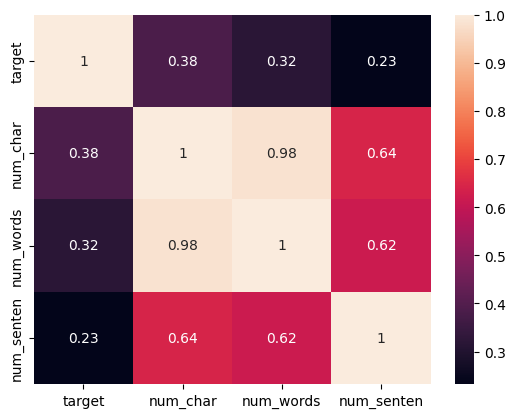

In [18]:
numeric_df = df.select_dtypes(include = 'number')
sns.heatmap(numeric_df.corr(), annot =True)
plt.show()

DATA PREPROCESSING


In [19]:
stopwords_list = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don',
    'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain',
    'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
    "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
    'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
    'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
    "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
])


In [20]:
def transform_text(text):
    text = text.lower()
    text = re.findall(r'\b\w+\b', text)

    y= []
    for i in text: 
        if i.isalnum():    #keep only alpha-numeric tokens 
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords_list:
            y.append(i)
    return y 
        

In [21]:
transform_text('hi how are you???')

['hi']

In [22]:
import spacy

nlp = spacy.load("en_core_web_sm")

def transform_text(text):
    doc = nlp(text.lower())
    tokens = []
    for token in doc:
        if token.is_alpha and not token.is_stop:
            tokens.append(token.lemma_)  # Lemma instead of stem
    return tokens


In [23]:
df['transformed_text']= df['text'].apply(transform_text)
df.head()

,target,text,num_char,num_words,num_senten,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,"[jurong, point, crazy, available, bugis, n, gr..."
1,0,Ok lar... Joking wif u oni...,29,6,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,11,2,"[u, dun, early, hor, u, c]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,0,"[nah, think, go, usf, live]"
